### Fake News Classifier
Dataset:  https://www.kaggle.com/c/fake-news/data#

In [54]:
import pandas as pd

In [55]:
df=pd.read_csv('fake-news/train.csv')

In [56]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [57]:
## Get the Independent Features

X=df.drop('label',axis=1)

In [58]:
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [59]:
## Get the Dependent features
y=df['label']

In [60]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [61]:
df.shape

(20800, 5)

In [64]:
pip install gensim


  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.23
    Uninstalling Cython-0.29.23:
      Successfully uninstalled Cython-0.29.23


In [213]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#from gensim.models import Word2Vev

from gensim.models import Word2Vec

In [68]:
df=df.dropna()

In [69]:
df.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [125]:
messages=df.copy()

In [126]:
messages.reset_index(inplace=True)

In [127]:
messages.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [128]:
messages['title'][6]

'Benoît Hamon Wins French Socialist Party’s Presidential Nomination - The New York Times'

In [129]:
messages.shape

(18285, 6)

In [130]:
messages=messages[0:1000]  #selected till 1000 for faster processing
messages.shape

(1000, 6)

In [108]:
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
tfidf_corpus=[]
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    print(review)
    sentences = nltk.word_tokenize(review)
    sentences = [word for word in sentences if word not in stopwords.words('english')]
    sentence_for_tfidf = ' '.join(sentences)
    #sentences = [nltk.word_tokenize(sentence) for sentence in review]
    print(sentences)
    #for i in range(len(sentences)):
     #   sentences[i] = [word for word in sentences[i] if word not in stopwords.words('english')]
    #sentences[i] = [word for word in sentences if word not in stopwords.words('english')]
    #review = review.split()
    #review= [ps.stem(word) for word in review if not in stopwords.words('english')]
    #review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    #review = ' '.join(review)
    corpus.append(sentences)
    tfidf_corpus.append(sentence_for_tfidf)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


house dem aide  we didn t even see comey s letter until jason chaffetz tweeted it
['house', 'dem', 'aide', 'even', 'see', 'comey', 'letter', 'jason', 'chaffetz', 'tweeted']
flynn  hillary clinton  big woman on campus   breitbart
['flynn', 'hillary', 'clinton', 'big', 'woman', 'campus', 'breitbart']
why the truth might get you fired
['truth', 'might', 'get', 'fired']
   civilians killed in single us airstrike have been identified
['civilians', 'killed', 'single', 'us', 'airstrike', 'identified']
iranian woman jailed for fictional unpublished story about woman stoned to death for adultery
['iranian', 'woman', 'jailed', 'fictional', 'unpublished', 'story', 'woman', 'stoned', 'death', 'adultery']
jackie mason  hollywood would love trump if he bombed north korea over lack of trans bathrooms  exclusive video    breitbart
['jackie', 'mason', 'hollywood', 'would', 'love', 'trump', 'bombed', 'north', 'korea', 'lack', 'trans', 'bathrooms', 'exclusive', 'video', 'breitbart']
beno t hamon wins fre

['massive', 'anti', 'trump', 'protests', 'union', 'square', 'nyc', 'live', 'stream']
review   lion  brings tears for a lost boy  wiped dry by google   the new york times
['review', 'lion', 'brings', 'tears', 'lost', 'boy', 'wiped', 'dry', 'google', 'new', 'york', 'times']
u s  general  islamic state chemical attack had  no impact  on u s  forces
['u', 'general', 'islamic', 'state', 'chemical', 'attack', 'impact', 'u', 'forces']
jury finds all oregon standoff defendants not guilty of federal conspiracy  gun charges
['jury', 'finds', 'oregon', 'standoff', 'defendants', 'guilty', 'federal', 'conspiracy', 'gun', 'charges']
clinton campaign stunned as fbi reportedly reopens probe into hillary clinton emails
['clinton', 'campaign', 'stunned', 'fbi', 'reportedly', 'reopens', 'probe', 'hillary', 'clinton', 'emails']
pence will speak at anti abortion rally   the new york times
['pence', 'speak', 'anti', 'abortion', 'rally', 'new', 'york', 'times']
bernie sanders says what the media won t  trump

['watergate', 'smoking', 'gun', 'emails', 'discuss', 'cleaning', 'obama', 'hillary', 'emails']
 chapo trap house   new left wing podcast is a flagrant rip off of the right stuff
['chapo', 'trap', 'house', 'new', 'left', 'wing', 'podcast', 'flagrant', 'rip', 'right', 'stuff']
taiwan responds after china sends carrier to taiwan strait   the new york times
['taiwan', 'responds', 'china', 'sends', 'carrier', 'taiwan', 'strait', 'new', 'york', 'times']
the mother of all october surprises why the house of cards will now come tumbling down
['mother', 'october', 'surprises', 'house', 'cards', 'come', 'tumbling']
explosive assange pilger interview on us election  expect riots if hillary wins
['explosive', 'assange', 'pilger', 'interview', 'us', 'election', 'expect', 'riots', 'hillary', 'wins']
telescope that  ate astronomy  is on track to surpass hubble   the new york times
['telescope', 'ate', 'astronomy', 'track', 'surpass', 'hubble', 'new', 'york', 'times']
closed afghan pakistani border is 

['scientists', 'say', 'canadian', 'bacteria', 'fossils', 'may', 'earth', 'oldest', 'new', 'york', 'times']
pro government forces advance in syria amid talk of u s  russia cooperation   the new york times
['pro', 'government', 'forces', 'advance', 'syria', 'amid', 'talk', 'u', 'russia', 'cooperation', 'new', 'york', 'times']
who cancer agency under fire for withholding  carcinogenic glyphosate  documents
['cancer', 'agency', 'fire', 'withholding', 'carcinogenic', 'glyphosate', 'documents']
work  walk   minutes  work    the new york times
['work', 'walk', 'minutes', 'work', 'new', 'york', 'times']
steve harvey talks housing with president elect trump   the new york times
['steve', 'harvey', 'talks', 'housing', 'president', 'elect', 'trump', 'new', 'york', 'times']
coalition  u s  troops fighting in mosul offensive  come under fire 
['coalition', 'u', 'troops', 'fighting', 'mosul', 'offensive', 'come', 'fire']
uk citizens and war heroes get cheap pre fab houses while muslim colonizers get

['cnn', 'statement', 'distances', 'network', 'buzzfeed', 'fake', 'news', 'dossier', 'breitbart']
c e o s ponder a new game  with trump s rules   the new york times
['c', 'e', 'ponder', 'new', 'game', 'trump', 'rules', 'new', 'york', 'times']
spicer on brady s stolen jersey   another bad on the press    breitbart
['spicer', 'brady', 'stolen', 'jersey', 'another', 'bad', 'press', 'breitbart']
a scaredy cat s investigation into why people enjoy fear   the new york times
['scaredy', 'cat', 'investigation', 'people', 'enjoy', 'fear', 'new', 'york', 'times']
the left s vision
['left', 'vision']
showdown looms as u s  questions chinese deal for german chip designer   the new york times
['showdown', 'looms', 'u', 'questions', 'chinese', 'deal', 'german', 'chip', 'designer', 'new', 'york', 'times']
trump administration to take harder tack on trade with china   the new york times
['trump', 'administration', 'take', 'harder', 'tack', 'trade', 'china', 'new', 'york', 'times']
pew  american trust l

['trump', 'religious', 'liberty', 'order', 'gives', 'sessions', 'major', 'leeway', 'breitbart']
 demoledor amparo contra salgado  keiko y    congresistas m s 
['demoledor', 'amparo', 'contra', 'salgado', 'keiko', 'congresistas']
in era of trump  china s president champions economic globalization   the new york times
['era', 'trump', 'china', 'president', 'champions', 'economic', 'globalization', 'new', 'york', 'times']
the sad saga of john walker lindh  rebel without a clue
['sad', 'saga', 'john', 'walker', 'lindh', 'rebel', 'without', 'clue']
courts disagree over michigan vote recount   the new york times
['courts', 'disagree', 'michigan', 'vote', 'recount', 'new', 'york', 'times']
bernie sanders s feud with the democratic leadership heats up   the new york times
['bernie', 'sanders', 'feud', 'democratic', 'leadership', 'heats', 'new', 'york', 'times']
the shortest and most powerful explanation of trump s victory i have ever seen
['shortest', 'powerful', 'explanation', 'trump', 'victo

['sonoma', 'county', 'california', 'voted', 'create', 'largest', 'gmo', 'free', 'zone', 'america']
fbi s comey  wikileaks is  intelligence porn   not journalism   breitbart
['fbi', 'comey', 'wikileaks', 'intelligence', 'porn', 'journalism', 'breitbart']
clare waight keller is named first female designer of givenchy   the new york times
['clare', 'waight', 'keller', 'named', 'first', 'female', 'designer', 'givenchy', 'new', 'york', 'times']
realities faced by black canadians are a national shame
['realities', 'faced', 'black', 'canadians', 'national', 'shame']
top nfl draft prospect caleb brantley charged with punching a woman in the face   breitbart
['top', 'nfl', 'draft', 'prospect', 'caleb', 'brantley', 'charged', 'punching', 'woman', 'face', 'breitbart']
videos on the pacific crest trail association and the lavoy finicim murder
['videos', 'pacific', 'crest', 'trail', 'association', 'lavoy', 'finicim', 'murder']
   life lessons from a man who s seen       deaths
['life', 'lessons', '

announcement by the saker community about the german saker blog   the vineyard of the saker
['announcement', 'saker', 'community', 'german', 'saker', 'blog', 'vineyard', 'saker']
shooting victims  families watch as gun measures stall once again   the new york times
['shooting', 'victims', 'families', 'watch', 'gun', 'measures', 'stall', 'new', 'york', 'times']
images reveal crashed schiaparelli mars lander
['images', 'reveal', 'crashed', 'schiaparelli', 'mars', 'lander']
grassroots coalition shares  many questions and concerns about betsy devos  with senators
['grassroots', 'coalition', 'shares', 'many', 'questions', 'concerns', 'betsy', 'devos', 'senators']
october     daily contrarian reads
['october', 'daily', 'contrarian', 'reads']
trump at inaugural balls   now the work begins     we are not playing games    breitbart
['trump', 'inaugural', 'balls', 'work', 'begins', 'playing', 'games', 'breitbart']
trump s choice of stephen bannon is nod to anti washington base   the new york tim

['donald', 'trump', 'el', 'primer', 'presidente', 'naranja', 'de', 'los', 'estados', 'unidos']
re  why did attorney general loretta lynch plead the fifth 
['attorney', 'general', 'loretta', 'lynch', 'plead', 'fifth']
russia  u s  missile defense  poses deep risk  to security of asia
['russia', 'u', 'missile', 'defense', 'poses', 'deep', 'risk', 'security', 'asia']
what does washington  plan b  in syria really mean 
['washington', 'plan', 'b', 'syria', 'really', 'mean']
upset by brexit  some british jews look to germany   the new york times
['upset', 'brexit', 'british', 'jews', 'look', 'germany', 'new', 'york', 'times']
girl asks her    boyfriends to each give her an iphone  uses the money to buy a house
['girl', 'asks', 'boyfriends', 'give', 'iphone', 'uses', 'money', 'buy', 'house']
amnesty international slams obama gov for killing     civilians in syria
['amnesty', 'international', 'slams', 'obama', 'gov', 'killing', 'civilians', 'syria']
finding his flock  a rural writer s book clu

['chaos', 'terror', 'ties', 'make', 'venezuela', 'direct', 'threat', 'usa', 'former', 'un', 'security', 'council', 'president', 'says', 'breitbart']
rick ross documentary video doubles as ad for checkers   the new york times
['rick', 'ross', 'documentary', 'video', 'doubles', 'ad', 'checkers', 'new', 'york', 'times']
oil has been spilling into the pacific ocean since last month and its being totally ignored
['oil', 'spilling', 'pacific', 'ocean', 'since', 'last', 'month', 'totally', 'ignored']
podesta to mills   we are going to have to dump all those emails 
['podesta', 'mills', 'going', 'dump', 'emails']
those who thoughtlessly disbelieve  conspiracy theories  need to read this
['thoughtlessly', 'disbelieve', 'conspiracy', 'theories', 'need', 'read']
dr  david duke and dr  slattery expose hillary s treason and why trump   duke will win 
['dr', 'david', 'duke', 'dr', 'slattery', 'expose', 'hillary', 'treason', 'trump', 'duke', 'win']
russian frigate off syrian cost blasts terrorist hq 

['gorka', 'trump', 'interventionist', 'commander', 'chief', 'nothing', 'changed', 'breitbart']
re  thank you fbi  the clinton email investigation has shifted the poll numbers significantly in trump s favor
['thank', 'fbi', 'clinton', 'email', 'investigation', 'shifted', 'poll', 'numbers', 'significantly', 'trump', 'favor']
race  not class  dictates republican future
['race', 'class', 'dictates', 'republican', 'future']
gorsuch  scalia a  lion of the law    judges should look to what law demands  not what they prefer   breitbart
['gorsuch', 'scalia', 'lion', 'law', 'judges', 'look', 'law', 'demands', 'prefer', 'breitbart']
nc state provides students with post election comfort food  therapy
['nc', 'state', 'provides', 'students', 'post', 'election', 'comfort', 'food', 'therapy']
iraqi troops push further into mosul      killed across iraq
['iraqi', 'troops', 'push', 'mosul', 'killed', 'across', 'iraq']
pregnant women turn to marijuana  perhaps harming infants   the new york times
['pregn

['criminal', 'chief']
all governments lie  the movie
['governments', 'lie', 'movie']
trump and brexit defeat globalism  for now anyway
['trump', 'brexit', 'defeat', 'globalism', 'anyway']
facing congress  some sports officials  not all  begin to confront sexual abuse   the new york times
['facing', 'congress', 'sports', 'officials', 'begin', 'confront', 'sexual', 'abuse', 'new', 'york', 'times']
airbnb ends fight with new york city over fines   the new york times
['airbnb', 'ends', 'fight', 'new', 'york', 'city', 'fines', 'new', 'york', 'times']
big pharma s martin shkreli suspended from twitter   breitbart
['big', 'pharma', 'martin', 'shkreli', 'suspended', 'twitter', 'breitbart']
next big tech corridor  between seattle and vancouver  planners hope   the new york times
['next', 'big', 'tech', 'corridor', 'seattle', 'vancouver', 'planners', 'hope', 'new', 'york', 'times']
evidence that robots are winning the race for american jobs   the new york times
['evidence', 'robots', 'winning', 

['elites', 'want', 'global', 'economy', 'collapse']
  best health benefits of sweating
['best', 'health', 'benefits', 'sweating']
senate confirms scott pruitt as e p a  head   the new york times
['senate', 'confirms', 'scott', 'pruitt', 'e', 'p', 'head', 'new', 'york', 'times']
crickets  snakes  crabs  a mix of fact and fraud in new york s subway   the new york times
['crickets', 'snakes', 'crabs', 'mix', 'fact', 'fraud', 'new', 'york', 'subway', 'new', 'york', 'times']
sessions s potential deputy faces a stern test on russia inquiries   the new york times
['sessions', 'potential', 'deputy', 'faces', 'stern', 'test', 'russia', 'inquiries', 'new', 'york', 'times']
 suicide squad  tops box office for second weekend   the new york times
['suicide', 'squad', 'tops', 'box', 'office', 'second', 'weekend', 'new', 'york', 'times']
health insurers plan rate hikes for obamacare exchanges   breitbart
['health', 'insurers', 'plan', 'rate', 'hikes', 'obamacare', 'exchanges', 'breitbart']
re  looks 

['leaked', 'audio', 'hillary', 'clinton', 'pushed', 'rigging', 'palestine', 'elections']
how the iranian saudi proxy struggle tore apart the middle east   the new york times
['iranian', 'saudi', 'proxy', 'struggle', 'tore', 'apart', 'middle', 'east', 'new', 'york', 'times']
lavrov and kerry discuss syrian settlement
['lavrov', 'kerry', 'discuss', 'syrian', 'settlement']
l influence des usa et de l otan dans les rapports de l ue avec la chine  manlio dinucci
['l', 'influence', 'des', 'usa', 'et', 'de', 'l', 'otan', 'dans', 'les', 'rapports', 'de', 'l', 'ue', 'avec', 'la', 'chine', 'manlio', 'dinucci']
open borders groups gird for h  b fights
['open', 'borders', 'groups', 'gird', 'h', 'b', 'fights']
will weinergate expose darker and dirtier secrets than we imagined 
['weinergate', 'expose', 'darker', 'dirtier', 'secrets', 'imagined']
trump s election breaks chains of political correctness
['trump', 'election', 'breaks', 'chains', 'political', 'correctness']
whitehouse gov takes down clim

['spared', 'gunman', 'charleston', 'churchgoer', 'describes', 'night', 'terror', 'new', 'york', 'times']
war on saturated fats has harmed people in poor countries who shunned traditional fats like coconut oil
['war', 'saturated', 'fats', 'harmed', 'people', 'poor', 'countries', 'shunned', 'traditional', 'fats', 'like', 'coconut', 'oil']
democrats  with garland on mind  mobilize for supreme court fight   the new york times
['democrats', 'garland', 'mind', 'mobilize', 'supreme', 'court', 'fight', 'new', 'york', 'times']
comment on   of the best kinds of milk that aren t dairy by   of the best kinds of milk that aren t dairy   collective evolution   apg editorial
['comment', 'best', 'kinds', 'milk', 'dairy', 'best', 'kinds', 'milk', 'dairy', 'collective', 'evolution', 'apg', 'editorial']
harry reid blasts comey for misconduct  drops bombshell  fbi is sitting on russian trump info
['harry', 'reid', 'blasts', 'comey', 'misconduct', 'drops', 'bombshell', 'fbi', 'sitting', 'russian', 'trump',

['texas', 'students', 'skip', 'school', 'protest', 'arrests', 'violent', 'criminals']
trump aides try to reassure europe  but many are wary   the new york times
['trump', 'aides', 'try', 'reassure', 'europe', 'many', 'wary', 'new', 'york', 'times']
will china trigger the next global recession 
['china', 'trigger', 'next', 'global', 'recession']
bombing kills more than     in baghdad   the new york times
['bombing', 'kills', 'baghdad', 'new', 'york', 'times']
comment on black racism by martin wright
['comment', 'black', 'racism', 'martin', 'wright']
thank you fbi  the clinton email investigation has shifted the poll numbers significantly in trump s favor
['thank', 'fbi', 'clinton', 'email', 'investigation', 'shifted', 'poll', 'numbers', 'significantly', 'trump', 'favor']
u s  rescue attempt in afghanistan missed western hostages by hours   the new york times
['u', 'rescue', 'attempt', 'afghanistan', 'missed', 'western', 'hostages', 'hours', 'new', 'york', 'times']
rick rule   a look at 

['clinton', 'transmitted', 'classified', 'info', 'lawyers']
hillary  russian hacking had to be  guided by americans   might have been trump   breitbart
['hillary', 'russian', 'hacking', 'guided', 'americans', 'might', 'trump', 'breitbart']
general election campaigning suspended in wake of manchester suicide bombing
['general', 'election', 'campaigning', 'suspended', 'wake', 'manchester', 'suicide', 'bombing']
 grand slam   father son film is smash hit for families
['grand', 'slam', 'father', 'son', 'film', 'smash', 'hit', 'families']
venezuela s economic crisis  does it mean that the left has failed 
['venezuela', 'economic', 'crisis', 'mean', 'left', 'failed']
herd of stampeding wild boars kills three islamic state jihadists   breitbart
['herd', 'stampeding', 'wild', 'boars', 'kills', 'three', 'islamic', 'state', 'jihadists', 'breitbart']
not from venus  not from mars  what we believe about gender and why it s often wrong   the new york times
['venus', 'mars', 'believe', 'gender', 'of

['barack', 'obama', 'delay', 'suspend', 'election', 'hillary', 'forced', 'new', 'fbi', 'email', 'investigation']
as donald trump incites feuds  other g o p  candidates flee his shadow   the new york times
['donald', 'trump', 'incites', 'feuds', 'g', 'p', 'candidates', 'flee', 'shadow', 'new', 'york', 'times']
germany  students forced to chant  allahu akbar   punished for refusing trip to mosque
['germany', 'students', 'forced', 'chant', 'allahu', 'akbar', 'punished', 'refusing', 'trip', 'mosque']
meteor  space junk  rocket  mysterious flash hits siberia
['meteor', 'space', 'junk', 'rocket', 'mysterious', 'flash', 'hits', 'siberia']
trump national security adviser called russian envoy day before sanctions were imposed   the new york times
['trump', 'national', 'security', 'adviser', 'called', 'russian', 'envoy', 'day', 'sanctions', 'imposed', 'new', 'york', 'times']
project veritas  implicated democratic operatives claim credit for romney     video
['project', 'veritas', 'implicated', '

In [109]:
corpus  #use this corpus for only w2v model

[['house',
  'dem',
  'aide',
  'even',
  'see',
  'comey',
  'letter',
  'jason',
  'chaffetz',
  'tweeted'],
 ['flynn', 'hillary', 'clinton', 'big', 'woman', 'campus', 'breitbart'],
 ['truth', 'might', 'get', 'fired'],
 ['civilians', 'killed', 'single', 'us', 'airstrike', 'identified'],
 ['iranian',
  'woman',
  'jailed',
  'fictional',
  'unpublished',
  'story',
  'woman',
  'stoned',
  'death',
  'adultery'],
 ['jackie',
  'mason',
  'hollywood',
  'would',
  'love',
  'trump',
  'bombed',
  'north',
  'korea',
  'lack',
  'trans',
  'bathrooms',
  'exclusive',
  'video',
  'breitbart'],
 ['beno',
  'hamon',
  'wins',
  'french',
  'socialist',
  'party',
  'presidential',
  'nomination',
  'new',
  'york',
  'times'],
 ['back',
  'channel',
  'plan',
  'ukraine',
  'russia',
  'courtesy',
  'trump',
  'associates',
  'new',
  'york',
  'times'],
 ['obama',
  'organizing',
  'action',
  'partners',
  'soros',
  'linked',
  'indivisible',
  'disrupt',
  'trump',
  'agenda'],
 ['bbc

In [184]:
tfidf_corpus   #use this corpus for count vectorizer,tfidf & tfidfw2v #very important

['house dem aide even see comey letter jason chaffetz tweeted',
 'flynn hillary clinton big woman campus breitbart',
 'truth might get fired',
 'civilians killed single us airstrike identified',
 'iranian woman jailed fictional unpublished story woman stoned death adultery',
 'jackie mason hollywood would love trump bombed north korea lack trans bathrooms exclusive video breitbart',
 'beno hamon wins french socialist party presidential nomination new york times',
 'back channel plan ukraine russia courtesy trump associates new york times',
 'obama organizing action partners soros linked indivisible disrupt trump agenda',
 'bbc comedy sketch real housewives isis causes outrage',
 'russian researchers discover secret nazi military base treasure hunter arctic photos',
 'us officials see link trump russia',
 'yes paid government trolls social media blogs forums websites',
 'major league soccer argentines find home success new york times',
 'wells fargo chief abruptly steps new york times',

In [90]:
# Training the Word2Vec model
model = Word2Vec(corpus, min_count=1)

In [92]:
word_vectors = model.wv
print(word_vectors)

In [96]:
vector = model.wv['new']    #sample vector rep of a word (100 dimension)
print(vector)
print(vector.shape)

[-5.5332696e-03  5.5065094e-03  7.1619092e-03  8.5909534e-03
 -9.0217944e-03 -1.3725666e-02  9.5065264e-03  1.5615726e-02
 -9.1201719e-03 -5.9284447e-03  5.6376047e-03 -8.5093966e-03
 -4.8743272e-03  6.0588340e-03 -4.3293340e-03 -4.7003063e-03
  3.7285557e-03 -3.6783251e-03 -9.1919806e-03 -1.5230871e-02
  9.2908619e-03  6.4041256e-03  1.1009261e-02 -8.4873033e-04
  5.8892104e-03 -2.2576356e-03 -4.8255106e-03  4.9376092e-03
 -1.0787645e-02 -3.3119142e-03 -3.7283669e-03 -2.2151794e-04
  9.5449882e-03 -1.0051742e-02 -3.1648795e-03  1.4295890e-03
  9.7887358e-03 -9.7943088e-03 -3.7333739e-04 -1.0138819e-02
 -9.8498520e-03  2.6284570e-03 -1.0848557e-02 -3.9386153e-03
 -2.0521463e-04 -1.2710268e-03 -1.3068705e-02  1.0718229e-02
  5.8429372e-03  1.3093432e-02 -6.8931854e-03 -1.0502338e-03
 -6.7366408e-03 -1.1640087e-03  5.3924676e-03 -4.0614088e-03
  7.8487406e-03 -7.1312338e-03 -6.2196297e-03  9.3913199e-03
 -2.6506260e-03  2.2288791e-03 -3.7019243e-03 -7.0137451e-03
 -4.0324708e-03  5.06389

In [94]:
words = model.wv.key_to_index #printing vocablury
words

{'new': 0,
 'york': 1,
 'times': 2,
 'trump': 3,
 'breitbart': 4,
 'hillary': 5,
 'clinton': 6,
 'donald': 7,
 'obama': 8,
 'u': 9,
 'us': 10,
 'election': 11,
 'news': 12,
 'war': 13,
 'russia': 14,
 'police': 15,
 'video': 16,
 'fbi': 17,
 'world': 18,
 'state': 19,
 'american': 20,
 'illegal': 21,
 'life': 22,
 'day': 23,
 'man': 24,
 'says': 25,
 'president': 26,
 'house': 27,
 'first': 28,
 'anti': 29,
 'america': 30,
 'one': 31,
 'briefing': 32,
 'bill': 33,
 'review': 34,
 'killed': 35,
 'like': 36,
 'de': 37,
 'people': 38,
 'black': 39,
 'vote': 40,
 'attack': 41,
 'white': 42,
 'government': 43,
 'media': 44,
 'putin': 45,
 'gun': 46,
 'women': 47,
 'comment': 48,
 'l': 49,
 'national': 50,
 'china': 51,
 'year': 52,
 'emails': 53,
 'fight': 54,
 'comey': 55,
 'go': 56,
 'campaign': 57,
 'syria': 58,
 'daily': 59,
 'russian': 60,
 'isis': 61,
 'email': 62,
 'brexit': 63,
 'work': 64,
 'watch': 65,
 'woman': 66,
 'n': 67,
 'get': 68,
 'open': 69,
 'home': 70,
 'back': 71,
 'ac

In [101]:
# average Word2Vec
# compute average word2vec for each review.
from tqdm import tqdm
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(corpus): # for each review/sentence
    sent_vec = np.zeros(100) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in words:
            vec = model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
#print(sent_vectors)
print(len(sent_vectors))
print(len(sent_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 10104.76it/s]

1000
100


In [209]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
#model_tfidf = TfidfVectorizer(max_features=5000,ngram_range=(1,3))
#model_tfidf.fit_transform(tfidf_corpus )
model_tfidf  = TfidfVectorizer()
X = model_tfidf .fit_transform(tfidf_corpus ).toarray()
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(model_tfidf.get_feature_names(), list(model_tfidf.idf_)))

In [210]:
print(model_tfidf.get_feature_names())

['aaron', 'ab', 'abbott', 'abc', 'abe', 'abedin', 'able', 'abortion', 'abramovi', 'abruptly', 'absolute', 'absurd', 'abu', 'abuse', 'abuses', 'accelerate', 'accept', 'access', 'accidentally', 'according', 'account', 'accountable', 'accusation', 'accused', 'ache', 'achieving', 'acquitted', 'across', 'act', 'action', 'active', 'activity', 'actor', 'actors', 'ad', 'additional', 'adds', 'adjaye', 'administration', 'admit', 'admits', 'adnan', 'adorable', 'adoring', 'adultery', 'adults', 'advance', 'advert', 'advertisement', 'advice', 'adviser', 'advisor', 'advocates', 'afar', 'affair', 'affirms', 'afforded', 'afghan', 'afghanistan', 'africa', 'african', 'ag', 'agencies', 'agency', 'agenda', 'agent', 'aggressive', 'agnes', 'ago', 'agreement', 'agrees', 'agribusiness', 'ahca', 'ai', 'aid', 'aide', 'aides', 'aiding', 'ailes', 'aimed', 'aims', 'air', 'airbnb', 'aircraft', 'airliner', 'airlines', 'airport', 'airstrike', 'akbar', 'akihito', 'al', 'alaska', 'alaskan', 'alberta', 'album', 'aleppo',

In [204]:
print(model_tfidf.get_feature_names())

['aaron', 'ab', 'abbott', 'abc', 'abe', 'abedin', 'able', 'abortion', 'abramovi', 'abruptly', 'absolute', 'absurd', 'abu', 'abuse', 'abuses', 'accelerate', 'accept', 'access', 'accidentally', 'according', 'account', 'accountable', 'accusation', 'accused', 'ache', 'achieving', 'acquitted', 'across', 'act', 'action', 'active', 'activity', 'actor', 'actors', 'ad', 'additional', 'adds', 'adjaye', 'administration', 'admit', 'admits', 'adnan', 'adorable', 'adoring', 'adultery', 'adults', 'advance', 'advert', 'advertisement', 'advice', 'adviser', 'advisor', 'advocates', 'afar', 'affair', 'affirms', 'afforded', 'afghan', 'afghanistan', 'africa', 'african', 'ag', 'agencies', 'agency', 'agenda', 'agent', 'aggressive', 'agnes', 'ago', 'agreement', 'agrees', 'agribusiness', 'ahca', 'ai', 'aid', 'aide', 'aides', 'aiding', 'ailes', 'aimed', 'aims', 'air', 'airbnb', 'aircraft', 'airliner', 'airlines', 'airport', 'airstrike', 'akbar', 'akihito', 'al', 'alaska', 'alaskan', 'alberta', 'album', 'aleppo',

In [211]:
model_tfidf.get_feature_names()

['aaron',
 'ab',
 'abbott',
 'abc',
 'abe',
 'abedin',
 'able',
 'abortion',
 'abramovi',
 'abruptly',
 'absolute',
 'absurd',
 'abu',
 'abuse',
 'abuses',
 'accelerate',
 'accept',
 'access',
 'accidentally',
 'according',
 'account',
 'accountable',
 'accusation',
 'accused',
 'ache',
 'achieving',
 'acquitted',
 'across',
 'act',
 'action',
 'active',
 'activity',
 'actor',
 'actors',
 'ad',
 'additional',
 'adds',
 'adjaye',
 'administration',
 'admit',
 'admits',
 'adnan',
 'adorable',
 'adoring',
 'adultery',
 'adults',
 'advance',
 'advert',
 'advertisement',
 'advice',
 'adviser',
 'advisor',
 'advocates',
 'afar',
 'affair',
 'affirms',
 'afforded',
 'afghan',
 'afghanistan',
 'africa',
 'african',
 'ag',
 'agencies',
 'agency',
 'agenda',
 'agent',
 'aggressive',
 'agnes',
 'ago',
 'agreement',
 'agrees',
 'agribusiness',
 'ahca',
 'ai',
 'aid',
 'aide',
 'aides',
 'aiding',
 'ailes',
 'aimed',
 'aims',
 'air',
 'airbnb',
 'aircraft',
 'airliner',
 'airlines',
 'airport',
 'a

In [214]:
# TF-IDF weighted Word2Vec
# tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(tfidf_corpus): # for each review/sentence 
    sent_vec = np.zeros(100) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in words and word in model_tfidf.get_feature_names():
            vec = model.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
print(tfidf_sent_vectors)

#messages['vectos of titles tfidfw2v'] = list(tfidf_sent_vectors)
    #row += 1

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:43<00:00,  9.63it/s]


[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0

In [199]:
#sample exmple of how output should look like
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus )
print(vectorizer.get_feature_names())

#print(X.shape)

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


In [132]:
messages.head(10)

,index,id,title,author,text,label,vectos of titles tfidfw2v
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [138]:
df_title_vec_tfidf = pd.DataFrame(messages['vectos of titles tfidfw2v'] .values.tolist())
df_title_vec_tfidf.head(100)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [119]:
#tfidf_df = pd.DataFrame(X_tfidf, columns=model_tfidf.get_feature_names())
#tfidf_df.head(10)

In [178]:
## Applying Countvectorizer
# Creating the Bag of Words model
#from sklearn.feature_extraction.text import CountVectorizer
#cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
#X = cv.fit_transform(corpus).toarray()

In [53]:
count_df_X = pd.DataFrame(X, columns=cv.get_feature_names())
count_df_X.head(10)

,aaron,abedin,abort,abus,access,access pipelin,access pipelin protest,account,accus,across,...,ya,year,year ago,year old,yet,york,york time,youth,zika,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
X.shape

(1000, 5000)

In [30]:
y=messages['label']

In [31]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [32]:
cv.get_feature_names()[:20]

['aaron',
 'abedin',
 'abort',
 'abus',
 'access',
 'access pipelin',
 'access pipelin protest',
 'account',
 'accus',
 'across',
 'action',
 'activ',
 'actor',
 'ad',
 'add',
 'administr',
 'admit',
 'ador',
 'advanc',
 'advis']

In [33]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [34]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names())

In [35]:
count_df.head()

,aaron,abedin,abort,abus,access,access pipelin,access pipelin protest,account,accus,across,...,ya,year,year ago,year old,yet,york,york time,youth,zika,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [36]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [78]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### MultinomialNB Algorithm

In [37]:

from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [38]:
from sklearn import metrics
import numpy as np
import itertools

In [39]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

accuracy:   0.876


NameError: name 'plot_confusion_matrix' is not defined

In [40]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.8757575757575757

In [41]:
y_train.shape

(670,)

### Passive Aggressive Classifier Algorithm

In [98]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(n_iter=50)

c:\users\krish.naik\appdata\local\continuum\anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


accuracy:   0.918
Confusion matrix, without normalization


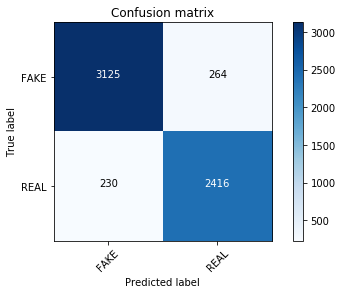

In [99]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

### Multinomial Classifier with Hyperparameter

In [103]:
classifier=MultinomialNB(alpha=0.1)

In [105]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

Alpha: 0.0, Score : 0.8903065451532726
Alpha: 0.1, Score : 0.9020712510356255
Alpha: 0.2, Score : 0.9025683512841757
Alpha: 0.30000000000000004, Score : 0.9024026512013256
Alpha: 0.4, Score : 0.9017398508699255
Alpha: 0.5, Score : 0.9015741507870754
Alpha: 0.6000000000000001, Score : 0.9022369511184756
Alpha: 0.7000000000000001, Score : 0.9025683512841757
Alpha: 0.8, Score : 0.9015741507870754
Alpha: 0.9, Score : 0.9017398508699255


In [42]:
## Get Features names
feature_names = cv.get_feature_names()

In [46]:
classifier.coef_[0]

array([-8.96814141, -8.96814141, -8.96814141, ..., -8.27499423,
       -8.96814141, -8.27499423])

In [49]:
### Most real
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]
sorted(zip(classifier.coef_[0],cv.get_feature_names()),reverse=True)[:20]

[(-5.096940403218923, 'trump'),
 (-5.441780889510652, 'hillari'),
 (-5.877098960768498, 'clinton'),
 (-6.260091213024603, 'elect'),
 (-6.329084084511555, 'us'),
 (-6.483234764338814, 'video'),
 (-6.570246141328443, 'obama'),
 (-6.570246141328443, 'email'),
 (-6.570246141328443, 'black'),
 (-6.665556321132768, 'vote'),
 (-6.665556321132768, 'new'),
 (-6.665556321132768, 'get'),
 (-6.665556321132768, 'donald trump'),
 (-6.665556321132768, 'donald'),
 (-6.770916836790594, 'war'),
 (-6.770916836790594, 'protest'),
 (-6.770916836790594, 'pipelin'),
 (-6.770916836790594, 'hillari clinton'),
 (-6.770916836790594, 'fbi'),
 (-6.770916836790594, 'de')]

In [135]:
### Most fake
sorted(zip(classifier.coef_[0], feature_names))[:5000]

[(-10.794984555596727, 'abe'),
 (-10.794984555596727, 'abroad'),
 (-10.794984555596727, 'abus new'),
 (-10.794984555596727, 'abus new york'),
 (-10.794984555596727, 'act new'),
 (-10.794984555596727, 'act new york'),
 (-10.794984555596727, 'advic'),
 (-10.794984555596727, 'advis new'),
 (-10.794984555596727, 'advis new york'),
 (-10.794984555596727, 'age new'),
 (-10.794984555596727, 'age new york'),
 (-10.794984555596727, 'agenda breitbart'),
 (-10.794984555596727, 'ail'),
 (-10.794984555596727, 'aleppo new'),
 (-10.794984555596727, 'aleppo new york'),
 (-10.794984555596727, 'ali'),
 (-10.794984555596727, 'america breitbart'),
 (-10.794984555596727, 'america new york'),
 (-10.794984555596727, 'american breitbart'),
 (-10.794984555596727, 'american new'),
 (-10.794984555596727, 'american new york'),
 (-10.794984555596727, 'ami'),
 (-10.794984555596727, 'ami schumer'),
 (-10.794984555596727, 'amp'),
 (-10.794984555596727, 'ann'),
 (-10.794984555596727, 'ann coulter'),
 (-10.794984555596